<b>Importing Pytorch and python files of project</b>

In [48]:
from datasets import *
from models import *
from Visualization import *
from train_test import *
import torch

<b>Selecting and Loading a dataset of Planetoid</b>

In [49]:
print("select a dataset: (Cora, CiteSeer, PubMed)")
dname = input()
dataset = get_planetoid_dataset(name=dname, normalize_features=True)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data = dataset[0]
data = data.to(device)

select a dataset: (Cora, CiteSeer, PubMed)


<b>Visualize input data(node features)</b>

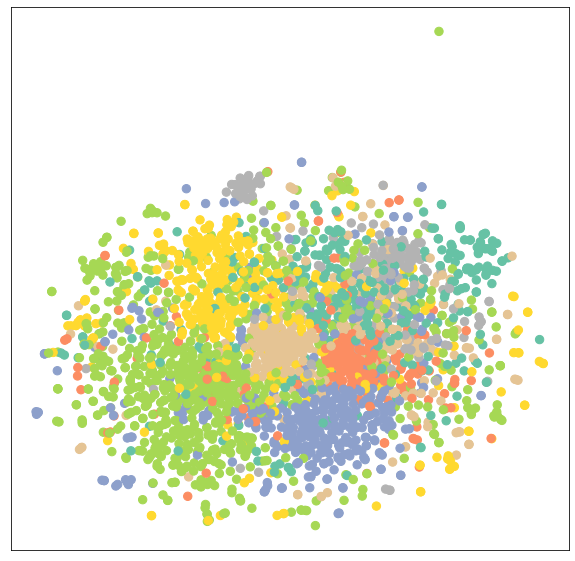

In [50]:
embed_visualize(data.x, color=data.y)

<b>Build and recall our GCN model</b>

In [51]:
model = GCN(dataset.num_features, dataset.num_classes, hidden_channels=16)
model.reset_parameters()

<b>optimize loss and evaluate our model base on val and test data</b>

In [52]:
losses = []
for epoch in range(1, 501):
    loss = train(model, data)
    losses.append(loss)
    if epoch%50==0:
        val_acc = test(model, data.val_mask, data)
        test_acc = test(model, data.test_mask, data)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

Epoch: 050, Loss: 1.3396, Val: 0.7700, Test: 0.7960
Epoch: 100, Loss: 0.8182, Val: 0.8120, Test: 0.8240
Epoch: 150, Loss: 0.6543, Val: 0.7880, Test: 0.8230
Epoch: 200, Loss: 0.4925, Val: 0.7820, Test: 0.8160
Epoch: 250, Loss: 0.4521, Val: 0.7840, Test: 0.8090
Epoch: 300, Loss: 0.4397, Val: 0.7900, Test: 0.8190
Epoch: 350, Loss: 0.3974, Val: 0.7860, Test: 0.8220
Epoch: 400, Loss: 0.3509, Val: 0.7900, Test: 0.8120
Epoch: 450, Loss: 0.4026, Val: 0.7920, Test: 0.8250
Epoch: 500, Loss: 0.3580, Val: 0.7780, Test: 0.8170


<b>Visualize final embedding</b>

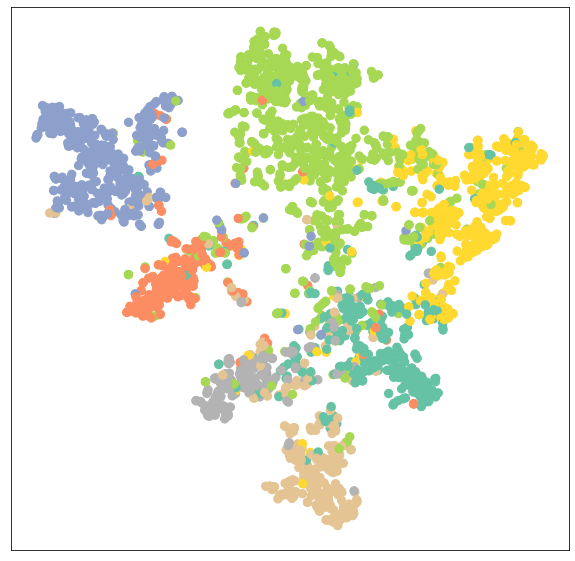

In [53]:
model.eval()
out = model(data.x, data.edge_index)
embed_visualize(out, color=data.y)

<b>Visualize losses</b>

c:\Users\Parsa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


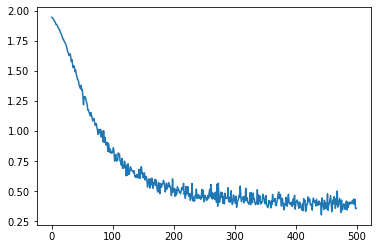

In [54]:
loss_visualize(losses)

<b>Build and recall our GraphSAGE model</b>

In [55]:
model = SAGE(dataset.num_features, dataset.num_classes, hidden_channels=16)
model.reset_parameters()

<b>optimize loss and evaluate our model base on val and test data</b>

In [56]:
losses = []
for epoch in range(1, 501):
    loss = train(model, data)
    losses.append(loss)
    if epoch%50==0:
        val_acc = test(model, data.val_mask, data)
        test_acc = test(model, data.test_mask, data)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

Epoch: 050, Loss: 1.9978, Val: 0.7140, Test: 0.7130
Epoch: 100, Loss: 1.9332, Val: 0.7180, Test: 0.7380
Epoch: 150, Loss: 1.9191, Val: 0.7160, Test: 0.7420
Epoch: 200, Loss: 1.9155, Val: 0.7380, Test: 0.7540
Epoch: 250, Loss: 1.9230, Val: 0.7760, Test: 0.8110
Epoch: 300, Loss: 1.9047, Val: 0.7560, Test: 0.7870
Epoch: 350, Loss: 1.9233, Val: 0.7600, Test: 0.7750
Epoch: 400, Loss: 1.8924, Val: 0.7640, Test: 0.7600
Epoch: 450, Loss: 1.9006, Val: 0.7800, Test: 0.7780
Epoch: 500, Loss: 1.9097, Val: 0.7640, Test: 0.7590


<b>Visualize final embedding</b>

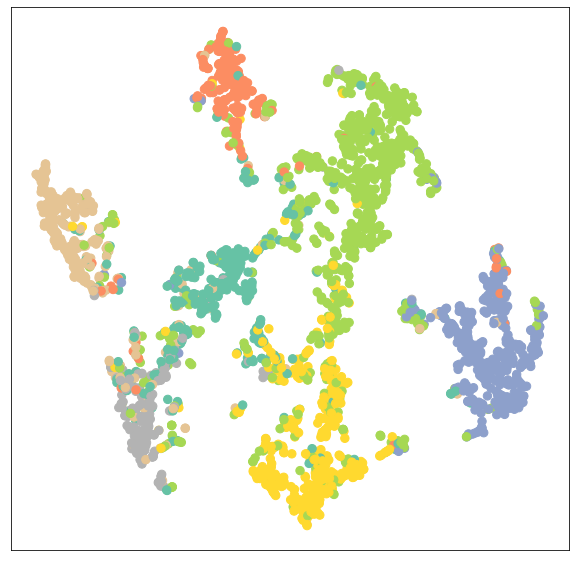

In [57]:
model.eval()
out = model(data.x, data.edge_index)
embed_visualize(out, color=data.y)

<b>Visualize losses</b>

c:\Users\Parsa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


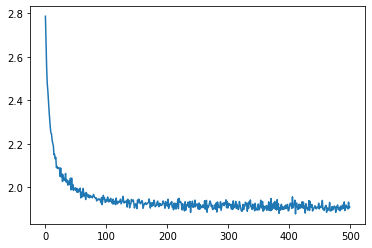

In [58]:
loss_visualize(losses)

<b>Build and recall our GAT model</b>

In [59]:
model = GAT(dataset.num_features, dataset.num_classes, hidden_channels=16, heads=8)
model.reset_parameters()

<b>optimize loss and evaluate our model base on val and test data</b>

In [60]:
losses = []
for epoch in range(1, 501):
    losses.append(loss)
    loss = train(model, data)
    if epoch%50 == 0:
        val_acc = test(model, data.val_mask, data)
        test_acc = test(model, data.test_mask, data)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

Epoch: 050, Loss: 0.5068, Val: 0.7940, Test: 0.8130
Epoch: 100, Loss: 0.3389, Val: 0.7480, Test: 0.7590
Epoch: 150, Loss: 0.3310, Val: 0.8040, Test: 0.8120
Epoch: 200, Loss: 0.3205, Val: 0.7740, Test: 0.7850
Epoch: 250, Loss: 0.2135, Val: 0.7960, Test: 0.8160
Epoch: 300, Loss: 0.2617, Val: 0.7380, Test: 0.7570
Epoch: 350, Loss: 0.2693, Val: 0.7740, Test: 0.7870
Epoch: 400, Loss: 0.2411, Val: 0.7840, Test: 0.7900
Epoch: 450, Loss: 0.2442, Val: 0.7920, Test: 0.7940
Epoch: 500, Loss: 0.2393, Val: 0.7780, Test: 0.7840


<b>Visualize final embedding</b>

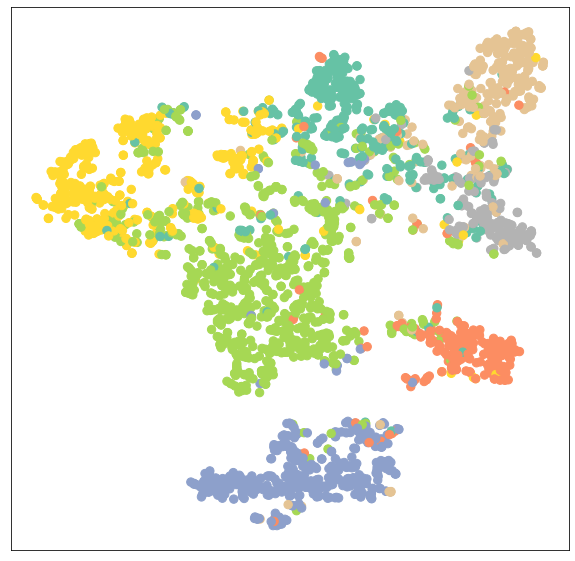

In [61]:
model.eval()
out = model(data.x, data.edge_index)
embed_visualize(out, color=data.y)

<b>Visualize losses</b>

c:\Users\Parsa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


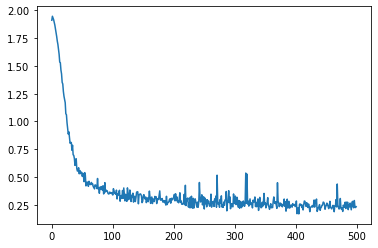

In [62]:
loss_visualize(losses)